# Prelab 05 -  Basic Wireless Receiver

### Exercise 5.1

A single local oscillator at frequency $f_{LO}$ and a single mixer can up-convert a tone (a pure sinusoid) at frequency $f_{BB}$ to a desired RF signal at frequency $f_{RF}=f_{LO}+f_{BB}$. Unfortunately, this up-converter will simultaneously up-convert the tone to an *image* at frequency $f_{IM}=f_{LO}-f_{BB}$. The image is $2f_{BB}$ away from the desired RF frequency, which for small $f_{BB}$ (baseband signals) is typically a very small frequency difference that causes significant problems in-band or even in adjacent bands. Such an up-converter is often referred to as a *homodyne modulator*. 

The corresponding receiver, the *homodyne demodulator* shown in the figure below, has a similar problem. Assume the antenna receives a signal at the desired RF frequency $f_{LO}+f_{BB}$ and an interfering signal at the image frequency $f_{LO}- f_{BB}$, i.e., 
$v_{RF}(t)=A \cos⁡(2\pi (f_{LO}- f_{BB} )t)+ B \cos⁡(2\pi (f_{LO}+f_{BB}) t) $.

![Homodyne demodulator.](Images/PS07-03.png)

#### Question 5.1a:

Show that both the desired RF signal and the interfering signal at the image frequency are simultaneously down-converted to the same tone at frequency $f_{BB}$.

*ANSWER:*

mixing of $f_x$ and $f_y$ results in signals with frequency $f_x + f_y$ and $f_x - f_y$

Therefore, mixing $f_{LO} + f_{BB}$ and $f_{LO} - f_{BB}$ with $F_{LO}$ results in an image of both at the desired baseband frequency:

image 1: $f_{LO} - (F_{BB} - F_{LO}) = f_{BB}$


image 2: $(f_{LO} + F_{BB}) - F_{LO} = f_{BB}$

#### Question 5.1b:

What happens in the output if $B=-A$?

*ANSWER:*

if B = -A, the downconverted signal disappears as $f_{BB}$ as the amplitudes cancel

#### Question 5.1c:

Can you think of a way to eliminate the image problem using a bandpass filter after the modulator and / or before the demodulator? If so, provide the specifications on this filter, and explain why small $f_{BB}$ relative $f_{RF}$ may be challenging in practice.

*ANSWER:*

to eliminate the image problem, a low pass filter can be used with cutoff frequency $f_c = f_{LO}$ before demodulating. this will eliminate the unwanted image from the original upconversion and therefore eliminate its image after downconversion. For small $f_{BB}$, this is difficult as the distance between $f_{LO} + f_{BB}$ and $f_{LO} - f_{BB}$ becomes smaller, requiring a higher order filter with more precise location.

### Exercise 5.2

Suppose the signal $v_{RF}(t) = A \cos(2\pi f_{RF} t) + B \cos(2\pi f_{IM} t)$ is input to the receiver architecture shown below, with $f_{IM} + f_{RF} = 2 f_{LO}$.

![Image Rejection Demodulator.](Images/PS07-01.png)

Argue that only the desired RF band appears about $f_{IF}$, the intermediate frequency of the output of the receiver, and specify $f_{IF}$ in terms of the other frequencies given.

*ANSWER:*

given the modulation, the resulting signals from the in-phase path are ($f_{RF} - f_{LO}$) and ($f_{LO} - f_{IM}$). The resulting signals from the sin path are ($f_{RF} - f_{LO}$) and -($f_{LO} - f_{IM}$). Because of sin is odd, ($f_{RF} - f_{LO}$) is negative. At this point, the sin components are 90 degrees out of phase with the cos components. The 90 degree shift allows the following cancellation after summation:

($f_{RF} - f_{LO}$) + ($f_{RF} - f_{LO}$)

($f_{LO} - f_{IM}$) - ($f_{LO} - f_{IM}$)

the top terms add while the bottom terms cancel, leaving us with a final signal of frequency $f_{RF} - f_{LO}$. This is equal to $F_{IF}$

### Exercise 5.3

The Fourier transform of the baseband signal $s_b(t)$ is shown below.

$$
S_b(f)=
\begin{cases}
\sqrt{2}, & -2 \le f \le 0,\\
-\sqrt{2}\,f + \sqrt{2}, & 0 \le f \le 1,\\
0, & \text{otherwise.}
\end{cases}
$$

![Fourier transform $S_b(f)$ of the signal $s_b(t)$.](Images/PS07-02.png)

Assume that $s_b(t)=s_R(t)+j s_I(t)$, where $s_R(t)$ and $s_I(t)$ are both real-valued signals. Sketch the corresponding Fourier transforms of $s_R(t)$ and $s_I(t)$.

**ANSWER:**

TODO


#### Exercise 5.4: Ideal Direct-Conversion Radios

Below is a diagram of an ideal direct conversion radios. $\tilde{s}(t)$ denotes the RF signal that propagates between the emitting and receiving radios.

![Ideal Direct-Conversion Block Diagram](Images/Ideal_IQ.png)

##### Question 5.4a:
Provide an expression of the received in-phase and quadrature signals, $r_I(t)$ and $r_Q(t)$, of an ideal direct-conversion radio when $s_I(t) = s_Q(t) = \cos(2\pi f_{BB} \, t)$

*ANSWER:*

$r_I(t) = S_I(t)$ and $r_Q(t) = s_Q(t)$

##### Question 5.4b:
Provide two plots:
1) The received in-phase and quadrature signals with respect to time, $r_I(t)$ and $r_Q(t)$, of an ideal direct-conversion radio when $s_I(t) = s_Q(t) = \cos(2\pi f_{BB} \, t)$. Use $f_{BB} = 7.5$ MHz and $f_c = 2.375$ GHz. Both the signals should be plotted on the same plot. Make sure that your Python code computes $r_I(t)$ and $r_Q(t)$ by performing the same operation performed by the radios.
2) A IQ plot with $r_I(t)$ on the x axis and $r_Q(t)$ on the y axis.

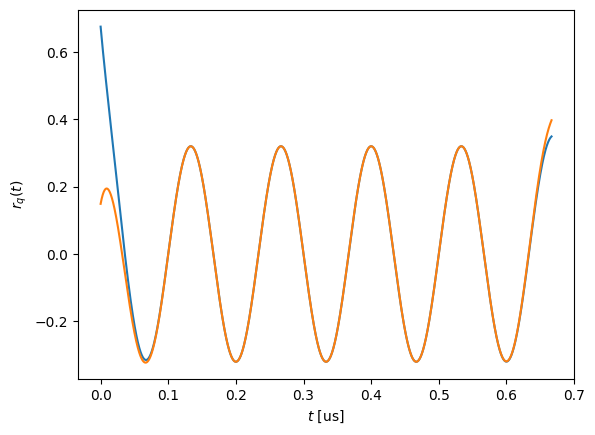

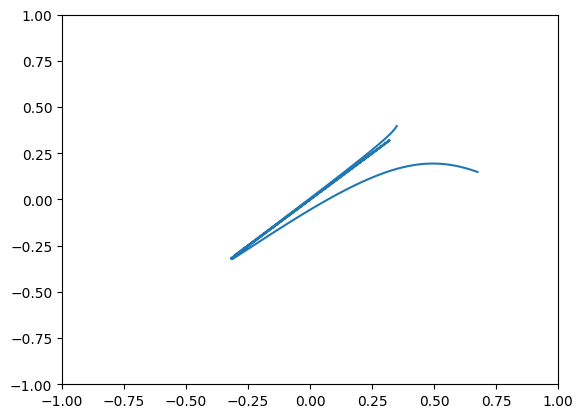

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter,filtfilt


def butter_lowpass_filter(data, cutoff, fs, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

f_BB = 7.5e6
f_c = 2.375e9

# Filter requirements.
T = 5/f_BB       # total duration of simulation, 5 waveperiods of baseband signal.
fs = 3*f_c       # sample rate, Hz
cutoff = 10e6      # desired cutoff frequency of the filter, Hz 
nyq = 0.5 * fs  # Nyquist Frequency
order = 1       # sin wave can be approx represented as quadratic
n = int(T * fs) # total number of samples

t=np.linspace(0,T,n)

### Your code goes here

#generate s_n signals
s_i = np.cos(2*np.pi*f_BB*t)
s_q = np.cos(2*np.pi*f_BB*t)

s_t = s_i * np.cos(2*np.pi*f_c*t) - s_q * np.sin(2*np.pi*f_c*t);

r_i_unfiltered = s_t*np.cos(2*np.pi*f_c*t)
r_q_unfiltered = -s_t*np.sin(2*np.pi*f_c*t)

r_i = butter_lowpass_filter(r_i_unfiltered, cutoff, fs, order)
r_q = butter_lowpass_filter(r_q_unfiltered, cutoff, fs, order)

### Plots functions

plt.plot(t*1e6,r_i)
plt.xlabel('$t$ [us]')
plt.ylabel('$r_i(t)$')

plt.plot(t*1e6,r_q)
plt.xlabel('$t$ [us]')
plt.ylabel('$r_q(t)$')

plt.figure()
plt.ylim((-1,1))
plt.xlim((-1,1))
plt.plot(r_i,r_q)

#### Exercise 5.5: Phase Offset Between the Local Oscillators

In this and following exercises, we will investigate the impact of non-idealities associated with the radios (which always occur to some extend when using real components) on the receive signals $r_I(t)$ and $r_Q(t)$.

Below is a diagram of an ideal direct-conversion radios in which the local oscillators of the receiving radio has a phase offset relative to the emitting radio.

![Direct-Conversion Radio Transmitter and Receiver with a Phase Offset.](Images/phase_offset_LO_IQ.png)

##### Question 5.5a:
Provide an expression of the received in-phase and quadrature signals, $r_I(t)$ and $r_Q(t)$, of the direct-conversion radio shown above when $s_I(t) = s_Q(t) = \cos(2\pi f_{BB} \, t)$.

*ANSWER:*

$r_I(t) = s_I(t)cos(\Delta\phi) - s_Q(t)sin(\Delta\phi)$

$r_Q(t) = s_Q(t)cos(\Delta\phi) - s_I(t)sin(\Delta\phi)$

##### Question 5.5b:
Provide 5 plots:
1) The received in-phase and quadrature signals with respect to time, $r_I(t)$ and $r_Q(t)$, of the above direct-conversion radio when $s_I(t) = \cos(2\pi f_{BB} \, t)$ and **$s_Q(t) = 0$** . Use $f_{BB} = 7.5$ MHz and $f_c = 2.375$ GHz. Both the signals should be plotted on the same plot. Make sure that your Python code computes $r_I(t)$ and $r_Q(t)$ by performing the same operation performed by the radios.
2) A IQ plot, $r_I(t)$ on the x axis and $r_Q(t)$ on the y axis when $\Delta \phi = 0$ deg. (Remember $s_Q(t) = 0$)
3) A IQ plot, $r_I(t)$ on the x axis and $r_Q(t)$ on the y axis when $\Delta \phi = 30$ deg.
4) A IQ plot, $r_I(t)$ on the x axis and $r_Q(t)$ on the y axis when $\Delta \phi = 90$ deg.

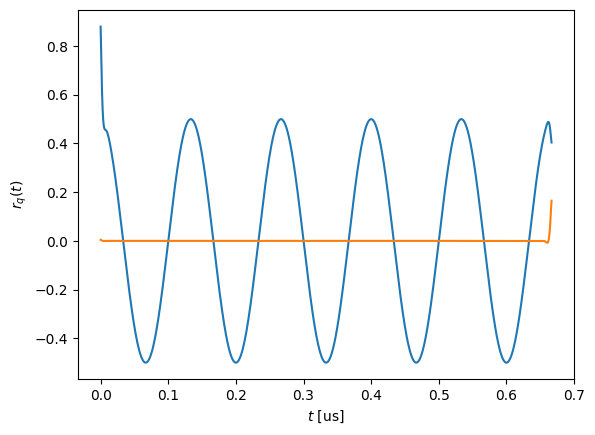

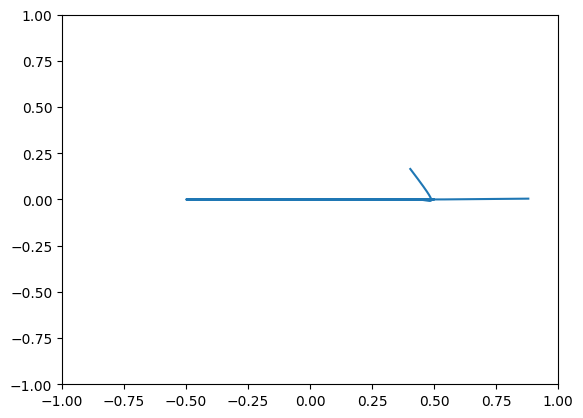

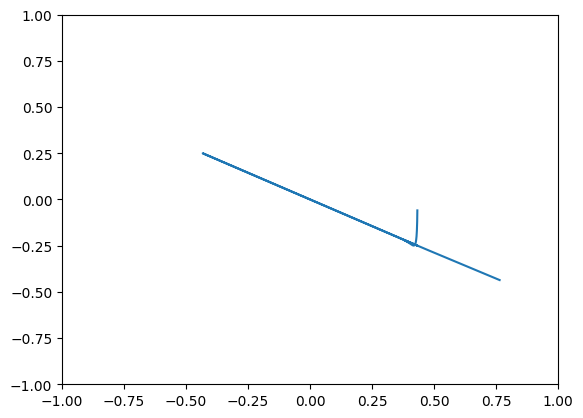

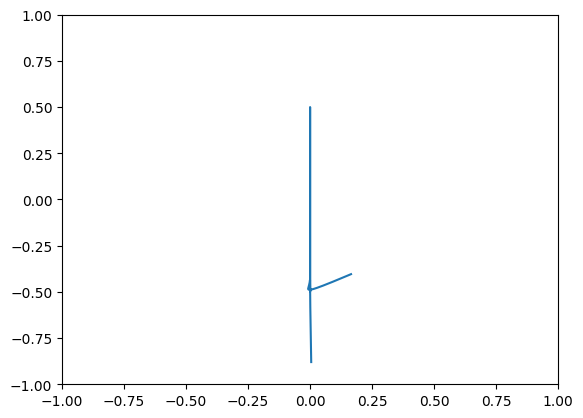

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter,filtfilt


def butter_lowpass_filter(data, cutoff, fs, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

f_BB = 7.5e6
f_c = 2.375e9

# Filter requirements.
T = 5/f_BB       # total duration of simulation, 5 waveperiods of baseband signal.
fs = 3*f_c       # sample rate, Hz
cutoff = 10e7      # desired cutoff frequency of the filter, Hz 
nyq = 0.5 * fs  # Nyquist Frequency
order = 2       # sin wave can be approx represented as quadratic
n = int(T * fs) # total number of samples

t=np.linspace(0,T,n)

### Your code goes here

#generate s_n signals
s_i = np.cos(2*np.pi*f_BB*t)
s_q = 0

s_t = s_i * np.cos(2*np.pi*f_c*t) - s_q * np.sin(2*np.pi*f_c*t);

Dphi = 0

r_i_unfiltered = s_t*np.cos(2*np.pi*f_c*t + Dphi)
r_q_unfiltered = -s_t*np.sin(2*np.pi*f_c*t + Dphi)

r_i = butter_lowpass_filter(r_i_unfiltered, cutoff, fs, order)
r_q = butter_lowpass_filter(r_q_unfiltered, cutoff, fs, order)

### Plots functions

plt.plot(t*1e6,r_i)
plt.xlabel('$t$ [us]')
plt.ylabel('$r_i(t)$')

plt.plot(t*1e6,r_q)
plt.xlabel('$t$ [us]')
plt.ylabel('$r_q(t)$')

plt.figure()
plt.ylim((-1,1))
plt.xlim((-1,1))
plt.plot(r_i,r_q)

#30 degrees
Dphi = 30*np.pi/180

r_i_unfiltered_30 = s_t*np.cos(2*np.pi*f_c*t + Dphi)
r_q_unfiltered_30 = -s_t*np.sin(2*np.pi*f_c*t + Dphi)

r_i_30 = butter_lowpass_filter(r_i_unfiltered_30, cutoff, fs, order)
r_q_30 = butter_lowpass_filter(r_q_unfiltered_30, cutoff, fs, order)

plt.figure()
plt.ylim((-1,1))
plt.xlim((-1,1))
plt.plot(r_i_30,r_q_30)

#90 degrees
Dphi = 90*np.pi/180

r_i_unfiltered_90 = s_t*np.cos(2*np.pi*f_c*t + Dphi)
r_q_unfiltered_90 = -s_t*np.sin(2*np.pi*f_c*t + Dphi)

r_i_90 = butter_lowpass_filter(r_i_unfiltered_90, cutoff, fs, order)
r_q_90 = butter_lowpass_filter(r_q_unfiltered_90, cutoff, fs, order)

plt.figure()
plt.ylim((-1,1))
plt.xlim((-1,1))
plt.plot(r_i_90,r_q_90)

##### Question 5.5c:
What do you observe in the IQ plots as $\Delta \phi$ increases?

*ANSWER:*

as $\Delta \phi$ increases, the received signal exhibits more correlation to the quadrature than in-phase component

#### Exercise 5.6: Frequency Offset Between the Local Oscillators

Below is a diagram of an ideal direct conversion radios when the local oscillators of the receiving radio has a frequency offset relative to the transmitter radio.

![Direct-Conversion Radio Transmitter and Receiver with a Frequency Offset.](Images/frequency_IQ.png)

##### Question 5.6a:
Provide an expression of the received in-phase and quadrature signals, $r_I(t)$ and $r_Q(t)$, of the direct-conversion radio shown above when $s_I(t) = s_Q(t) = \cos(2\pi f_{BB} \, t)$

*ANSWER:*

$s_I(t)$

##### Question 5.6b:
Provide two plots:
1) The received in-phase and quadrature signals with respect to time, $r_I(t)$ and $r_Q(t)$, of the above direct-conversion radio when $s_I(t) = \cos(2\pi f_{BB} \, t)$ and **$s_Q(t) = 0$** . Use $f_{BB} = 7.5$ MHz and $f_c = 2.375$ GHz. Both the signals should be plotted on the same plot. Make sure that your Python code computes $r_I(t)$ and $r_Q(t)$ by performing the same operation performed by the radios.
2) A IQ plot, $r_I(t)$ on the x axis and $r_Q(t)$ on the y axis when $\Delta \phi = 0 $ deg. (Remember $s_Q(t) = 0$)

For both of these plots, use a larger duration of the signal and set $\Delta f$ to $20$ kHz.

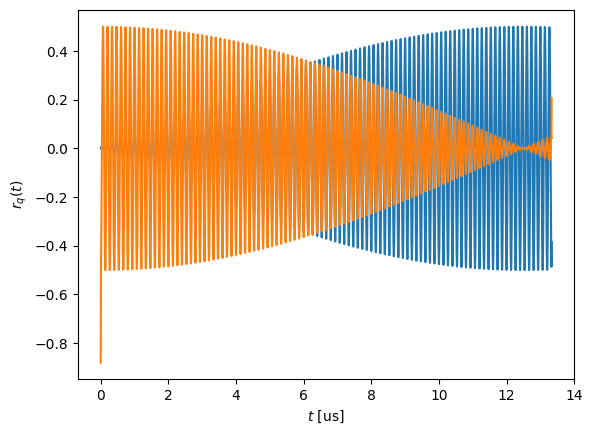

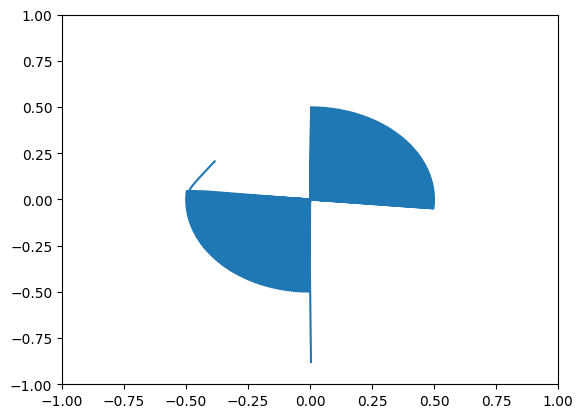

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter,filtfilt


def butter_lowpass_filter(data, cutoff, fs, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

f_BB = 7.5e6
f_c = 2.375e9

# Filter requirements.
T = 100/f_BB       # total duration of simulation, 5 waveperiods of baseband signal.
fs = 3*f_c       # sample rate, Hz
cutoff = 10e7      # desired cutoff frequency of the filter, Hz 
nyq = 0.5 * fs  # Nyquist Frequency
order = 2       # sin wave can be approx represented as quadratic
n = int(T * fs) # total number of samples

t=np.linspace(0,T,n)

### Your code goes here

#generate s_n signals
s_i = np.cos(2*np.pi*f_BB*t)
s_q = 0

s_t = s_i * np.cos(2*np.pi*f_c*t) - s_q * np.sin(2*np.pi*f_c*t);

Dfc = 20e3

r_i_unfiltered = s_t*np.cos(2*np.pi*(f_c + Dfc)*t + Dphi)
r_q_unfiltered = -s_t*np.sin(2*np.pi*(f_c + Dfc)*t + Dphi)

r_i = butter_lowpass_filter(r_i_unfiltered, cutoff, fs, order)
r_q = butter_lowpass_filter(r_q_unfiltered, cutoff, fs, order)

### Plots functions

plt.plot(t*1e6,r_i)
plt.xlabel('$t$ [us]')
plt.ylabel('$r_i(t)$')

plt.plot(t*1e6,r_q)
plt.xlabel('$t$ [us]')
plt.ylabel('$r_q(t)$')

plt.figure()
plt.ylim((-1,1))
plt.xlim((-1,1))
plt.plot(r_i,r_q)
